In [1]:
import torch
from torch import nn
torch.__version__

'2.4.0+cu121'

In [2]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
from typing_extensions import dataclass_transform
##custom data
import requests
import zipfile
from pathlib import Path

data_path=Path('data/')
image_path=data_path/'pizza_steak_sushi'

if image_path.is_dir():
    print(f'{image_path} directory exists')
else:
    print(f'creating {image_path} directory')
    image_path.mkdir(parents=True,exist_ok=True)

with open(data_path/'pizza_steak_sushi.zip','wb') as f:
    request=requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print('downloading pizza steak sushi data')
    f.write(request.content)
with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip','r') as zip_ref:
    print('unzipping pizza steak sushi data')
    zip_ref.extractall(image_path)

creating data/pizza_steak_sushi directory
downloading pizza steak sushi data
unzipping pizza steak sushi data


In [4]:
##Data preparation
import os
def walk_through_dir(dir_path):
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f'there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')


In [5]:
walk_through_dir(image_path)

there are 2 directories and 0 images in data/pizza_steak_sushi
there are 3 directories and 0 images in data/pizza_steak_sushi/test
there are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
there are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
there are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
there are 3 directories and 0 images in data/pizza_steak_sushi/train
there are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
there are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
there are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza


In [6]:
##train and test patj
train_dir=image_path/'train'
test_dir=image_path/'test'
train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image shape: (512, 512)


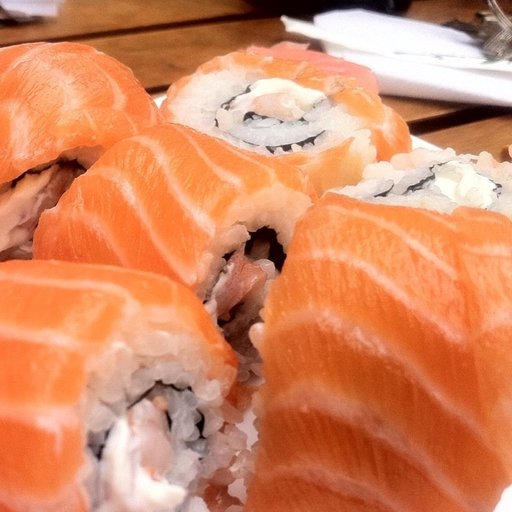

In [7]:
import random
from PIL import Image

img=random.choice(os.listdir(train_dir/'sushi'))
img_path=train_dir/'sushi'/img
img=Image.open(img_path)
print(f"Random image shape: {img.size}")
img

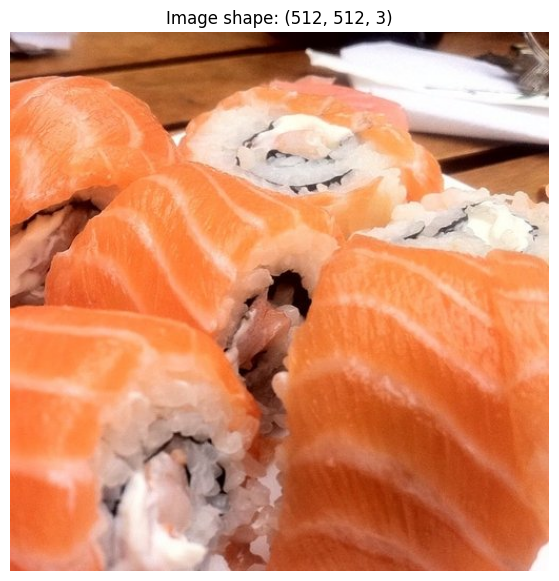

In [8]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array=np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f'Image shape: {img_as_array.shape}')
plt.axis('off')
plt.show()

In [9]:
##Convert data into tensors
import torch
from torchvision import transforms,datasets
from torch.utils.data import DataLoader

image_transform=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()

])

In [10]:
image_transform(img)

tensor([[[0.7529, 0.8353, 0.8431,  ..., 0.4941, 0.4314, 0.3255],
         [0.4980, 0.6392, 0.7294,  ..., 0.5098, 0.5373, 0.3961],
         [0.2392, 0.2431, 0.3451,  ..., 0.5725, 0.6275, 0.6392],
         ...,
         [0.9255, 0.9255, 0.9412,  ..., 0.8275, 0.8784, 0.9686],
         [0.9098, 0.9176, 0.9333,  ..., 0.8431, 0.9255, 0.9922],
         [0.8627, 0.8980, 0.9059,  ..., 0.8588, 0.9725, 0.9961]],

        [[0.6863, 0.7882, 0.7922,  ..., 0.3725, 0.2745, 0.1451],
         [0.3725, 0.5333, 0.6275,  ..., 0.3882, 0.4078, 0.2392],
         [0.1176, 0.1216, 0.2235,  ..., 0.4784, 0.5333, 0.5333],
         ...,
         [0.4824, 0.4824, 0.4941,  ..., 0.4392, 0.6039, 0.8941],
         [0.4706, 0.4980, 0.5294,  ..., 0.5059, 0.7686, 0.9804],
         [0.3647, 0.4392, 0.5059,  ..., 0.6039, 0.9176, 0.9882]],

        [[0.7373, 0.8431, 0.8510,  ..., 0.3255, 0.2118, 0.0745],
         [0.3608, 0.5412, 0.6431,  ..., 0.3255, 0.3529, 0.1686],
         [0.1020, 0.1098, 0.2039,  ..., 0.4235, 0.4863, 0.

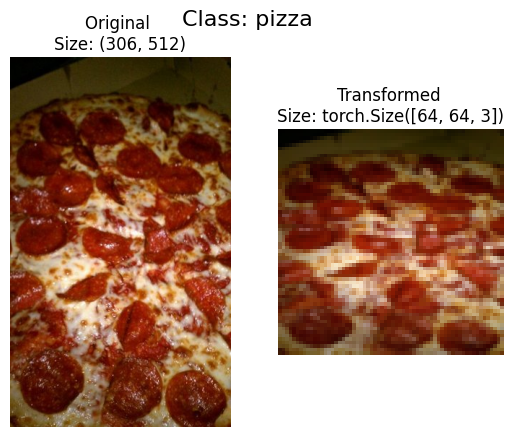

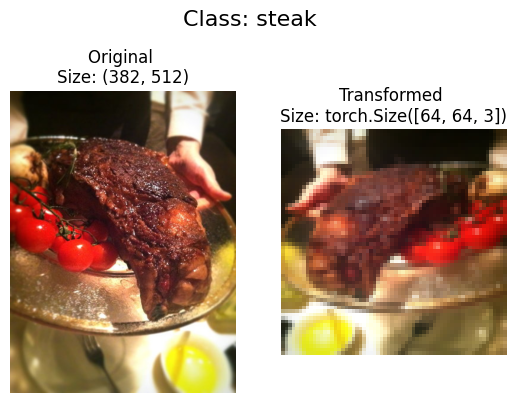

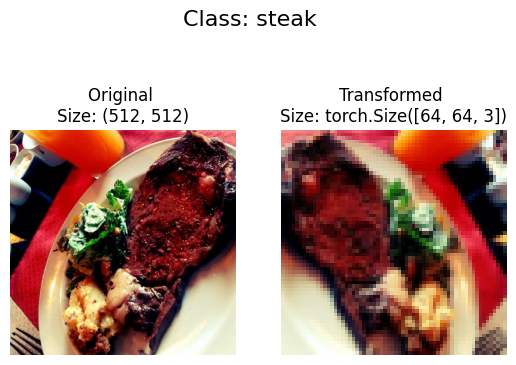

In [11]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):

    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))
plot_transformed_images(image_path_list,
                        transform=image_transform,
                        n=3)


In [12]:
from torchvision import datasets
from torch.utils.data import DataLoader
train_data=datasets.ImageFolder(root=train_dir,transform=image_transform,target_transform=None)
test_data=datasets.ImageFolder(root=test_dir,transform=image_transform)

In [13]:
train_data

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [14]:
train_data.classes

['pizza', 'steak', 'sushi']

In [15]:
class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [16]:
len(train_data),len(test_data)

(225, 75)

In [17]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [18]:
img,label=train_data[0][0],train_data[0][1]
print(f'image shape: {img.shape},label: {label}')

image shape: torch.Size([3, 64, 64]),label: 0


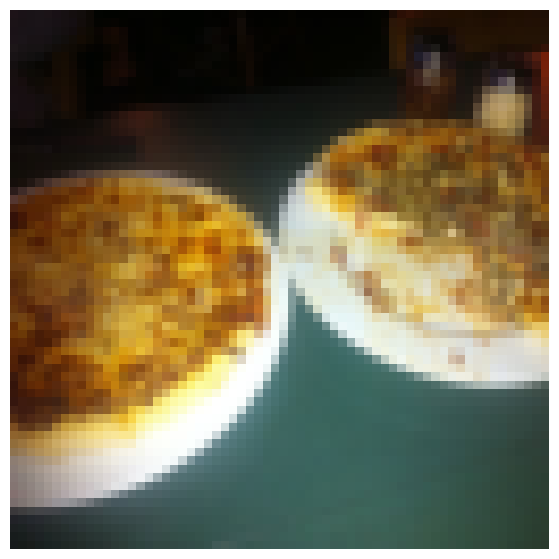

In [19]:
img_permute=img.permute(1,2,0)
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis('off')
plt.show()

In [20]:
##Create dataloader
train_dataloader=DataLoader(dataset=train_data,batch_size=32,shuffle=True,num_workers=os.cpu_count())
test_dataloader=DataLoader(dataset=test_data,batch_size=32,shuffle=False,num_workers=os.cpu_count())

In [21]:
train_dataloader

In [22]:
len(train_dataloader),len(test_dataloader)

(8, 3)

In [23]:
img,label=next(iter(train_dataloader))
print(f'image shape: {img.shape},label: {label}')

image shape: torch.Size([32, 3, 64, 64]),label: tensor([2, 1, 0, 1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 2, 0, 1, 0, 1, 0, 1,
        0, 2, 1, 2, 0, 0, 0, 1])


In [24]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from typing import Tuple,Dict
import random
from PIL import Image

In [25]:
target_directory=train_dir
print(f"Target directory: {target_directory}")

class_names_found=sorted(entry.name for entry in os.scandir(target_directory) if entry.is_dir())
class_names_found

Target directory: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [26]:
def find_classes(directory:str)->Tuple[Dict[str,int],Dict[int,str]]:
    classes=sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    classes_to_idx={cls_name:i for i,cls_name in enumerate(classes)}
    if not classes_to_idx:
        raise ValueError(f'No classes found in {directory}')
    return classes,classes_to_idx


In [27]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [28]:
##custom datasets
from torch.utils.data import Dataset
class ImageFolderCustom(Dataset):
  def __init__(self,targ_dir:str,transforms=None):
      self.paths=list(Path(targ_dir).glob("*/*.jpg"))
      self.transform=transforms
      self.classes,self.class_to_idx=find_classes(targ_dir)
  def load_image(self,index:int)->Image.Image:
    image_path=self.paths[index]
    return Image.open(image_path)
  def __len__(self):
    return len(self.paths)
  def __getitem__(self,index:int):
    img=self.load_image(index)
    class_name=self.paths[index].parent.name
    class_idx=self.class_to_idx[class_name]
    if self.transform:
      return self.transform(img),class_idx
    else:
      return img,class_idx

In [29]:
train_trasform=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transform=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [30]:
train_data_custom=ImageFolderCustom(train_dir,train_trasform)
test_data_custom=ImageFolderCustom(test_dir,test_transform)

In [31]:
len(train_data_custom)

225

In [32]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [33]:
def display_random_images_and_labels(dataset:torch.utils.data.Dataset,classes,n,display_shape,seed=42):
  random.seed(seed)
  if n>10:
    n=10
    display_shape=False
    print("n should be larger than 10")
  if seed:
    random.seed(seed)
  random_samples_idx=random.sample(range(len(dataset)),k=n)
  for idx in random_samples_idx:
    img,label=dataset[idx][0],dataset[idx][1]
    plt.figure(figsize=display_shape)
    plt.imshow(img.permute(1,2,0))
    plt.title(f'class: {classes[label]}')
    plt.axis('off')
    plt.show()

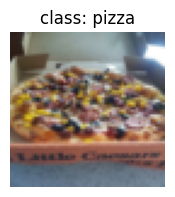

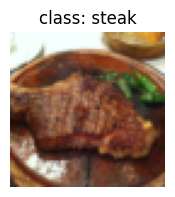

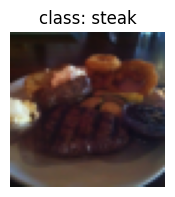

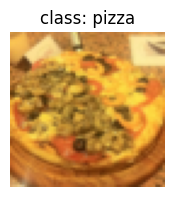

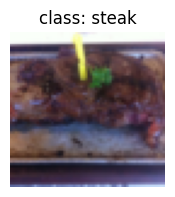

In [34]:
display_random_images_and_labels(train_data_custom,train_data_custom.classes,5,(2,5))

In [35]:
### Custom loaded into DataLoaders

In [36]:
from torch.utils.data import DataLoader
batch_size=32
Num_workers=os.cpu_count()
train_dataloader_custom=DataLoader(dataset=train_data_custom,batch_size=batch_size,shuffle=True,num_workers=Num_workers)
test_dataloader_custom=DataLoader(dataset=test_data_custom,batch_size=batch_size,shuffle=False,num_workers=Num_workers)


In [37]:
img_custom,label_custom=next(iter(train_dataloader_custom))
print(f'image shape: {img_custom.shape},label: {label_custom}')

image shape: torch.Size([32, 3, 64, 64]),label: tensor([0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0,
        2, 1, 1, 2, 2, 2, 0, 0])


In [38]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense
    transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
])

# Don't need to perform augmentation on the test data
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

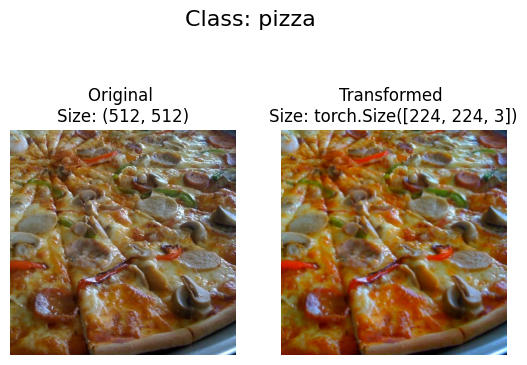

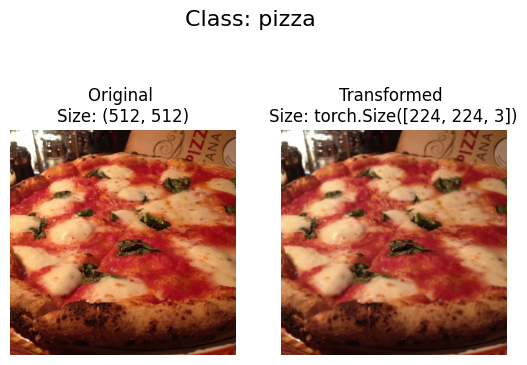

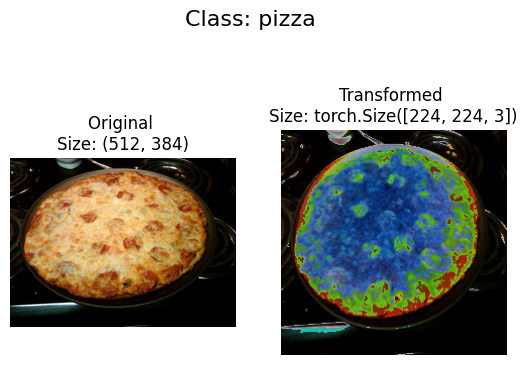

In [39]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

In [40]:
simple_transform=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])


In [41]:
train_data_simple=datasets.ImageFolder(root=train_dir,transform=simple_transform,target_transform=None)
test_data_simple=datasets.ImageFolder(root=test_dir,transform=simple_transform)

In [42]:
from torchvision import transforms
train_data_simple=datasets.ImageFolder(root=train_dir,transform=train_transforms)
test_data_simple=datasets.ImageFolder(root=test_dir,transform=test_transforms)

import os
from torch.utils.data import DataLoader
batch_size=32
Num_workers=os.cpu_count()
train_dataloader_simple=DataLoader(dataset=train_data_simple,batch_size=batch_size,shuffle=True,num_workers=Num_workers)
test_dataloader_simple=DataLoader(dataset=test_data_simple,batch_size=batch_size,shuffle=False,num_workers=Num_workers)


In [43]:
class TinyVGG(nn.Module):

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [44]:
image_batch,label_batch=next(iter(train_dataloader))
image_batch.shape,label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [45]:
model_0(image_batch.to(device)).shape

torch.Size([32, 3])

In [46]:
!pip install torchinfo

In [47]:
##Torch info
import torchinfo
from torchinfo import summary
summary(model_0,input_size=(32,3,64,64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

In [48]:
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device:torch.device):
  model.train()
  train_loss,train_acc=0,0
  for batch,(X,y) in enumerate(dataloader):
    X,y=X.to(device),y.to(device)
    y_pred=model(X)
    loss=loss_fn(y_pred,y)
    train_loss+=loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_class=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc+=(y_pred_class==y).sum().item()/len(y_pred)
  train_loss=train_loss/len(dataloader)
  train_acc=train_acc/len(dataloader)
  return train_loss,train_acc

In [49]:
def test_step(model:torch.nn.Module,
               dataloader:torch.utils.data,
               loss_fn:torch.nn.Module,
               device:torch.device):
  model.eval()
  test_loss,test_acc=0,0
  with torch.inference_mode():
    for batch,(X,y) in enumerate(dataloader):
      X,y=X.to(device),y.to(device)
      test_pred=model(X)
      loss=loss_fn(test_pred,y)
      test_loss+=loss.item()
      test_pred_class=torch.argmax(torch.softmax(test_pred,dim=1),dim=1)
      test_acc+=(test_pred_class==y).sum().item()/len(test_pred)
    test_loss=test_loss/len(dataloader)
    test_acc=test_acc/len(dataloader)
  return test_loss,test_acc

In [50]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_0.parameters(),lr=0.001)
device='cuda' if torch.cuda.is_available() else 'cpu'

In [53]:
from tqdm.auto import tqdm
epochs=5
def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module,
          epochs:int,
          device:torch.device):
  model.to(device)
  results={
      'train_loss':[],
      'train_acc':[],
      'test_loss':[],
      'test_acc':[]
  }
  for epoch in tqdm(range(epochs)):
    train_loss,train_acc=train_step(model=model,
                                    dataloader=train_dataloader,
                                    loss_fn=loss_fn,
                                    optimizer=optimizer,
                                    device=device)
    test_loss,test_acc=test_step(model=model,
                                 dataloader=test_dataloader,
                                 loss_fn=loss_fn,
                                 device=device)
    print(f'Epoch: {epoch+1} | train_loss: {train_loss:.4f} | train_acc: {train_acc:.4f} | test_loss: {test_loss:.4f} | test_acc: {test_acc:.4f}')
    results['train_loss'].append(train_loss)
    results['train_acc'].append(train_acc)
    results['test_loss'].append(test_loss)
    results['test_acc'].append(test_acc)
  return results

In [55]:
torch.manual_seed(42)
model_0=TinyVGG(input_shape=3,hidden_units=10,output_shape=len(train_data.classes)).to(device)
optimizer=torch.optim.Adam(params=model_0.parameters(),lr=0.001)
loss_fn=nn.CrossEntropyLoss()
results=train(model=model_0,
              train_dataloader=train_dataloader,
              test_dataloader=test_dataloader,
              optimizer=optimizer,
              loss_fn=loss_fn,
              epochs=50,
              device=device)



  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1076 | train_acc: 0.2695 | test_loss: 1.1380 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0828 | train_acc: 0.4258 | test_loss: 1.1681 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1203 | train_acc: 0.2930 | test_loss: 1.1727 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0949 | train_acc: 0.4141 | test_loss: 1.1416 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0945 | train_acc: 0.2930 | test_loss: 1.1405 | test_acc: 0.1979
Epoch: 6 | train_loss: 1.0920 | train_acc: 0.3516 | test_loss: 1.1458 | test_acc: 0.2708
Epoch: 7 | train_loss: 1.1061 | train_acc: 0.4219 | test_loss: 1.1308 | test_acc: 0.2396
Epoch: 8 | train_loss: 1.0721 | train_acc: 0.3789 | test_loss: 1.0837 | test_acc: 0.4441
Epoch: 9 | train_loss: 1.0253 | train_acc: 0.6445 | test_loss: 1.0346 | test_acc: 0.5445
Epoch: 10 | train_loss: 0.9621 | train_acc: 0.6172 | test_loss: 0.9930 | test_acc: 0.5142
Epoch: 11 | train_loss: 0.9027 | train_acc: 0.5000 | test_loss: 0.9946 | test_acc: 0.4744
Epoch: 12 | train_l

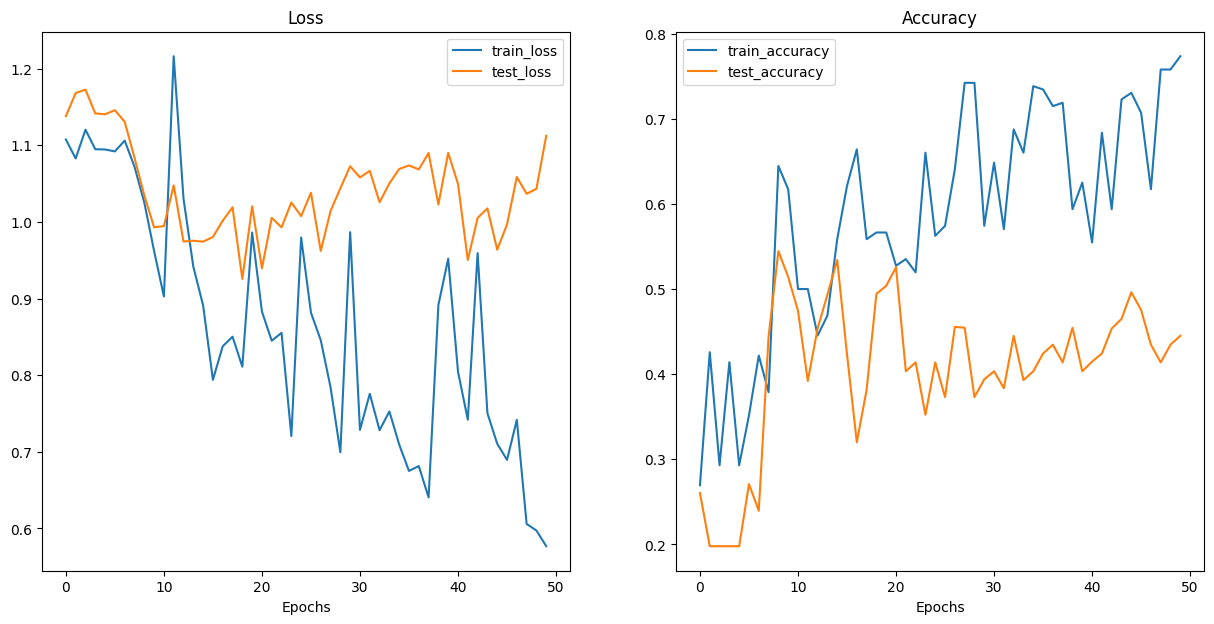

<function __main__.plot_loss_curves(results)>

In [57]:
def plot_loss_curves(results):
  loss=results['train_loss']
  test_loss=results['test_loss']
  accuracy=results['train_acc']
  test_accuracy=results['test_acc']
  epochs=range(len(results['train_loss']))
  plt.figure(figsize=(15,7))
  plt.subplot(1,2,1)
  plt.plot(epochs,loss,label='train_loss')
  plt.plot(epochs,test_loss,label='test_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy,label='train_accuracy')
  plt.plot(epochs,test_accuracy,label='test_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()
  plt.show()
  return plot_loss_curves
plot_loss_curves(results)

In [58]:
##With data augmentation
from torchvision import transforms
train_transform=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [59]:
train_data_aug=datasets.ImageFolder(root=train_dir,transform=train_transform)
test_data_aug=datasets.ImageFolder(root=test_dir,transform=test_transform)

In [60]:
import os
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()
train_dataloader_aug=DataLoader(dataset=train_data_aug,
                                 batch_size=BATCH_SIZE,
                                 shuffle=True,
                                 num_workers=NUM_WORKERS)
test_dataloader_aug=DataLoader(dataset=test_data_aug,
                                 batch_size=BATCH_SIZE,
                                 shuffle=False,
                                 num_workers=NUM_WORKERS)


In [63]:
torch.manual_seed(42)
model_1=TinyVGG(input_shape=3,hidden_units=10,output_shape=len(train_data.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [64]:
torch.manual_seed(42)
optimizer=torch.optim.Adam(params=model_1.parameters(),lr=0.001)
loss_fn=nn.CrossEntropyLoss()
results_aug=train(model=model_1,
              train_dataloader=train_dataloader_aug,
              test_dataloader=test_dataloader_aug,
              optimizer=optimizer,
              loss_fn=loss_fn,
              epochs=50,
              device=device)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1076 | train_acc: 0.2500 | test_loss: 1.1062 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0791 | train_acc: 0.4258 | test_loss: 1.1387 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0810 | train_acc: 0.4258 | test_loss: 1.1695 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1291 | train_acc: 0.3047 | test_loss: 1.1622 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0901 | train_acc: 0.4258 | test_loss: 1.1476 | test_acc: 0.2604
Epoch: 6 | train_loss: 1.0969 | train_acc: 0.3047 | test_loss: 1.1452 | test_acc: 0.2604
Epoch: 7 | train_loss: 1.0916 | train_acc: 0.4609 | test_loss: 1.1465 | test_acc: 0.1979
Epoch: 8 | train_loss: 1.1016 | train_acc: 0.2930 | test_loss: 1.1517 | test_acc: 0.1979
Epoch: 9 | train_loss: 1.1207 | train_acc: 0.2930 | test_loss: 1.1461 | test_acc: 0.1979
Epoch: 10 | train_loss: 1.0970 | train_acc: 0.2930 | test_loss: 1.1140 | test_acc: 0.2188
Epoch: 11 | train_loss: 1.0925 | train_acc: 0.4102 | test_loss: 1.1107 | test_acc: 0.2604
Epoch: 12 | train_l

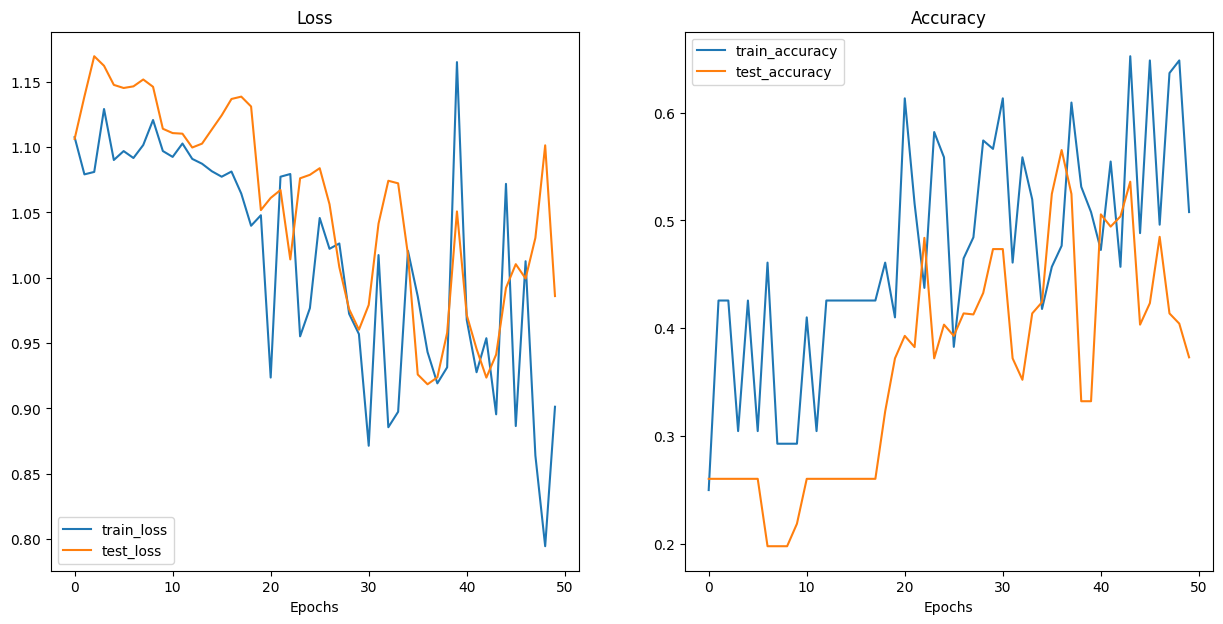

<function __main__.plot_loss_curves(results)>

In [66]:
plot_loss_curves(results_aug)

In [68]:
import pandas as pd
model_0_results=pd.DataFrame(results)
model_1_results=pd.DataFrame(results_aug)
model_0_results

,train_loss,train_acc,test_loss,test_acc
0,1.107582,0.269531,1.138034,0.260417
1,1.082830,0.425781,1.168136,0.197917
2,1.120321,0.292969,1.172684,0.197917
3,1.094902,0.414062,1.141583,0.197917
4,1.094513,0.292969,1.140519,0.197917
5,1.092031,0.351562,1.145757,0.270833
6,1.106088,0.421875,1.130841,0.239583
7,1.072136,0.378906,1.083713,0.444129
8,1.025319,0.644531,1.034570,0.544508
9,0.962082,0.617188,0.992977,0.514205


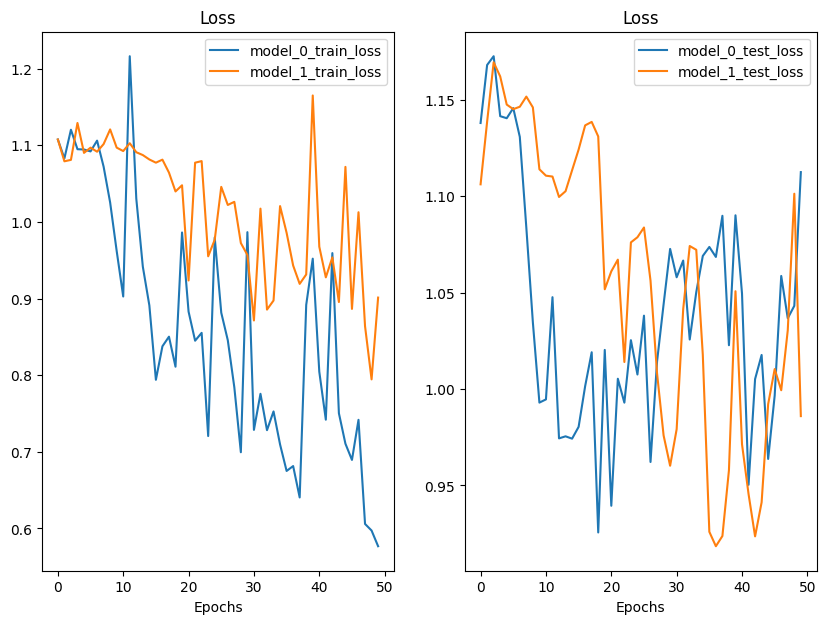

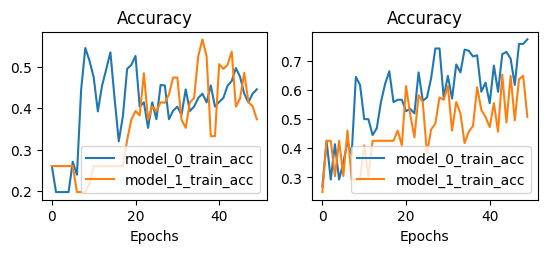

In [76]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
epochs=range(len(results['train_loss']))
plt.plot(epochs,model_0_results['train_loss'],label='model_0_train_loss')
plt.plot(epochs,model_1_results['train_loss'],label='model_1_train_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs,model_0_results['test_loss'],label='model_0_test_loss')
plt.plot(epochs,model_1_results['test_loss'],label='model_1_test_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.subplot(2,2,4)
plt.plot(epochs,model_0_results['train_acc'],label='model_0_train_acc')
plt.plot(epochs,model_1_results['train_acc'],label='model_1_train_acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs,model_0_results['test_acc'],label='model_0_train_acc')
plt.plot(epochs,model_1_results['test_acc'],label='model_1_train_acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

In [77]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

In [83]:

# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

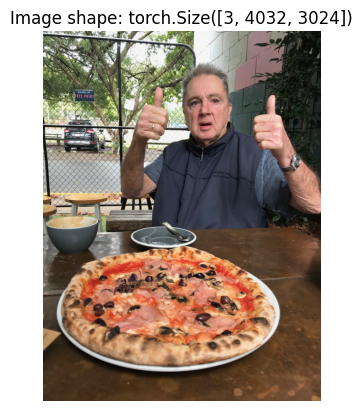

In [84]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [85]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([3, 64, 64])


In [86]:
model_1.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [87]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[ 0.4325, -0.7632, -0.8369]], device='cuda:0')
Prediction probabilities: tensor([[0.6315, 0.1910, 0.1775]], device='cuda:0')
Prediction label: tensor([0], device='cuda:0')


In [91]:
# Find the predicted label
# Get class names as a list
class_names = train_data.classes
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'pizza'